<a href="https://colab.research.google.com/github/Leomitin/HH_analisys_04-24/blob/main/Business_analyst_Vacancies_HH_ru_March_2024..ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b>Комментарий ревьюера:</b> Привет! Меня зовут Матушевич Ольга и я буду делать ревью проекта. Моя основная цель - отметить позитивные моменты и дать дополнительные рекомендации. Для удобства я оставлю комментарии в подобных ячейках.

❌ Критическая ошибка
    
Так выделены самые важные замечания. Эти замечания очень важные! Их нужно обязательно отработать, перед тем как показывать работу другим специалистам по Анализе данных.

⚠️ Замечание
    
Так выделены небольшие замечания. Я надеюсь, что их ты тоже учтешь - твой проект от этого станет только лучше.
    
✔️ Верное решение
    
Так я выделяю правильные и верные действия, а так же все остальные комментарии.

**Общее впечатление**: Хорошая идея - разбить работу по обработке кода на 2 файла. Еслия  праивльно понимаю - в файле по аналитику данных такой же код, так что его можно ен проверять.

Ты очень тщательно подошел к работе над задачей. Твой код хотя и не идеален - но его уровень выше. чем я ожидала на этом этапе обучения. Однако тебе стоит:

* Начать использовать pivot_table вместо group by  и заменть сложносоставные названия строк на простые названия строк, выведя вторйо уровень в название столбцов. Такие таблицы визуально понятней.
* Добавить граифики. Они облегчают понимание информации.

**Общее впечатление презентация**: Прекрасная работа. Ты заморочился и создал таблицы заново, а не просто вставил принскрины. Оформление спокойное, оно не перетягивает на себя одеяло, но сильно повышает общий уровень работы. Тексты написаны в хорошем информационном стиле. Но тут же чувствуется, что с графиками было бы лучше. Так жестоит выгружать презенацию в формат pdf, а не отправлять в текущем

In [ ]:
from google.colab import drive
import numpy as np
from itertools import chain
drive.mount('/content/gdrive')
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#загрузим данные в переменную и посмотрим на таблицу
vacancies_ba = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/vacancies_ba.xlsx')
display(vacancies_ba.head(5))
vacancies_ba.info()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,77538397,Бизнес-аналитик,2024-03-27 09:32:37,https://hh.ru/vacancy/77538397,Открытая,Спортмастер,"Компания «СПОРТМАСТЕР», Офис",Москва,Junior+ (1-3 years),"['Аналитическое мышление', 'Business Studio', ...",Полный день,Полная занятость,«спортмастер» — это международный спортивный р...,спортмастер международный спортивный ритейлер ...,NaN,NaN,ЗП не указана,"MS Visio, Business Studio, MS PowerPoint, Опти...",NaN,"Документация, Аналитическое мышление"
1,79582672,Бизнес-аналитик / Системный аналитик (продукто...,2024-03-22 16:41:24,https://hh.ru/vacancy/79582672,Открытая,Первая Форма,NaN,Санкт-Петербург,Middle (3-6 years),"['Документация', 'Коммуникация']",Удаленная работа,Полная занятость,"рассмотрим кандидатов со всех регионов рф, гот...",рассматривать кандидат весь регион рф готовый ...,NaN,NaN,ЗП не указана,NaN,NaN,"Коммуникация, Документация"
2,80597746,Бизнес-аналитик 1С,2024-03-18 09:39:53,https://hh.ru/vacancy/80597746,Открытая,Газпром нефть,NaN,Санкт-Петербург,Junior (no experince),"['Управление проектами', 'Разработка техническ...",Полный день,Полная занятость,мы – команда «газпромнефть – цифровые решения»...,команда газпромнефть цифровой решение часть ит...,NaN,NaN,ЗП не указана,"Управление проектами, Разработка технических з...",NaN,Документация
3,81519791,Бизнес-аналитик ЛИС (лабораторной информационн...,2024-03-19 07:18:50,https://hh.ru/vacancy/81519791,Открытая,MedmaGroup,NaN,Екатеринбург,Junior+ (1-3 years),['Аналитическое мышление'],Полный день,Полная занятость,группа медицинских компаний &quot;медма&quot; ...,группа медицинский компания quot медма quot об...,NaN,NaN,ЗП не указана,NaN,NaN,Аналитическое мышление
4,81862636,Аналитик бизнес-процессов,2024-03-18 10:51:56,https://hh.ru/vacancy/81862636,Открытая,Главгосэкспертиза России,NaN,Москва,Junior+ (1-3 years),['Документация'],Удаленная работа,Полная занятость,главгосэкспертиза россии – драйвер цифровой тр...,главгосэкспертиза россия драйвер цифровой тран...,NaN,NaN,ЗП не указана,NaN,NaN,Документация


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1011 non-null   int64         
 1   name                              1011 non-null   object        
 2   published_at                      1011 non-null   datetime64[ns]
 3   alternate_url                     1011 non-null   object        
 4   type                              1011 non-null   object        
 5   employer                          1011 non-null   object        
 6   department                        210 non-null    object        
 7   area                              1011 non-null   object        
 8   experience                        1011 non-null   object        
 9   key_skills                        1011 non-null   object        
 10  schedule                          1011 non-null 

Датафрейм подгрузился корректно. По инфотаблице видим, что hard & soft skills заполнены не везде. Пр иэтом наиболее полная информация содержится в столбце key_skills. Данных по з/п тоже немного. Проанализируем имеющиеся выведя средние значения. Проведем предобработку данных

⚠️ Замечание

Этапы предоборатка и EDA пропущены. Ок. я понимаю, это версия проекта на github, но все равно хотелось бы их увидеть.

In [ ]:
#приведем анализируемые поля к строчному формату
vacancies_ba['name'] = vacancies_ba['name'].str.lower()
vacancies_ba['employer'] = vacancies_ba['employer'].str.lower()
vacancies_ba['key_skills'] = vacancies_ba['key_skills'].str.lower()
vacancies_ba['key_skills_from_key_skills_field'] = vacancies_ba['key_skills_from_key_skills_field'].str.lower()
vacancies_ba['hard_skills_from_description'] = vacancies_ba['hard_skills_from_description'].str.lower()
vacancies_ba['soft_skills_from_description'] = vacancies_ba['soft_skills_from_description'].str.lower()
#display(vacancies_ba.head(5))

In [ ]:
#Изучим перечень key_skills для обработки. Для этого выведем скилы в отдельный список. Приведем столбец к формату списка списков и с помощью функции перенесем скилы в отдельный список иотберем уникальные
vacancies_skills = vacancies_ba
vacancies_skills['key_skills'] = vacancies_skills['key_skills'].apply(eval)
all_skills = []
for skills_list in vacancies_skills['key_skills']:
    all_skills.extend(skills_list)
    skills_df = pd.DataFrame({'Skills': all_skills})

print(set(all_skills))

{'быстрое погружение в предметную область', 'разработка регламентов', 'сamunda', 'directum', 'управление интернет-проектами', 'управление рисками', 'ит аналитик', 'умение организовывать работу, планировать', 'бизнес-консультирование', 'организация встреч', 'оценка потребностей клиентов', 'web-дизайн', 'разработка и внедрение политик и процедур', 'опыт консультирования', 'uml', 'разработка склада', 'качество данных', 'data analysis', 'автоматизированные банковские системы (абс)', 'поиск и привлечение клиентов', 'диадок', 'инвестиционное планирование', 'написание технических заданий', '1с: управление производственным предприятием', 'личный кабинет', 'интеграция', 'моделирование бизнес процессов', 'idef', 'консолидированная бухгалтерская отчетность', 'умение работать в условиях многозадачности', 'соблюдение дэдлайнов', 'страхование', 'построение cjm и use story', 'тестирование', 'творческое мышление', 'qlik sense', 'internet', 'анализ абс', 'нси', 'способность анализировать проблемы', 'dm

In [ ]:
#Проверим дубликаты:
vacancies_ba['key_skills'] = vacancies_ba['key_skills'].astype(str)
print('Число дубликатов в таблице:', vacancies_ba.duplicated().sum())

#Обработаем неявные дубликаты в поле key_skills
def replace_values(skills_count, replacements):
  for old_value, new_value in replacements:
      vacancies_ba['key_skills'] = vacancies_ba['key_skills'].str.replace(old_value, new_value)
  return skills_count

replacements = [
    ('1 с предприятие', '1c'),
    ('1c: бухгалтерия', '1c'),
    ('1c: бухгалтерия', '1c'),
    ('1c: зарплата и кадры', '1c'),
    ('1c: финансы', '1c'),
    ('1с', '1c'),
    ('1с предприятие 8', '1c'),
    ('1с предприятие 8', '1c'),
    ('1с: битфинанс', '1c'),
    ('1с: бп', '1c'),
    ('atlassian jira', 'jira'),
    ('1с: бухгалтерия', '1c'),
    ('1с: дгу', '1c'),
    ('1с: документооборот', '1c'),
    ('1с: зарплата и кадры', '1c'),
    ('1с: зарплата и управление персоналом', '1c'),
    ('1с: предприятие', '1c'),
    ('1с: предприятие 8', '1c'),
    ('1с: розница', '1c'),
    ('1с: управление персоналом', '1c'),
    ('1с: управление предприятием', '1c'),
    ('1с: управление производственным предприятием', '1c'),
    ('1с: управление торговлей', '1c'),
    ('1с: управление холдингом', '1c'),
    ('1с:комплексная автоматизация','1c'),
    ('1с:предприятие 8.3','1c'),
    ('223 -фз','223-фз'),
    ('bpmn 1.2','bpmn'),
    ('bpmn 2.0','bpmn'),
    ('bpmn2.0','bpmn'),
    ('confluence.','confluence'),
    ('erp systems','erp'),
    ('erp-системы','erp'),
    ('erp на базе 1c','erp'),
    ('erp-системы на базе 1с','erp'),
    ('hr','hr системы'),
    ('ms powerpoin','power point'),
    ('ms powerpoint','power point'),
    ('знание основ sql','sql'),
    ('sql запросы','sql'),
    ('базовые знания sql','sql'),
    ('postgresql','sql'),
    ('postgres','sql'),
    ('pl/sql','sql'),
    ('pl/pgsql','sql'),
    ('powerbi','power bi'),
    ('swot','swot анализ'),
    ('автоматизация процессов','автоматизация бизнес-процессов'),
    ('автоматизация процессов управления персоналом','автоматизация бизнес-процессов'),
    ('анализ бизнес процессов','анализ бизнес-процессов'),
    ('анализ бизнес-процессов.','анализ бизнес-процессов'),
    ('анализ бизнес-процессов.','анализ бизнес-процессов'),
    ('аналитик','бизнес-анализ'),
    ('аналитическая работа','бизнес-анализ'),
    ('аналитический склад ума','аналитическое мышление'),
    ('аналитические способности','аналитическое мышление'),
    ('бизнес аналитик','бизнес-анализ'),
    ('бизнес-аналитик','бизнес-анализ'),
    ('бизнес-аналитика','бизнес-анализ'),
    ('битрикс24','битрикс 24'),
    ('гост34','гост 34'),
    ('гибкость','гибкость мышления'),
    ('документальное сопровождение','документооборот'),
    ('документация','документооборот'),
    ('документация проекта','документооборот'),
    ('документирование бизнес-требований','документооборот'),
    ('знание типовых продуктов 1с','1c'),
    ('коммуникативные навыки','коммуникабельность'),
    ('деловая коммуникация','коммуникабельность'),
    ('коммуникация','коммуникабельность'),
    ('кредит','кредитование'),
    ('кредитные договоры','кредитование'),
    ('кредитный конвейер','кредитование'),
    ('кредитный процесс','кредитование'),
    ('кредитный рейтинг','кредитование'),
    ('кредиты для бизнеса','кредитование'),
    ('моделирование бизнес-процессов предприятия','моделирование бизнес процессов'),
    ('моделирование в ecxel','моделирование бизнес процессов'),
    ('моделирование процессов','моделирование бизнес процессов'),
    ('описание и моделирование бизнес-процессов','моделирование бизнес процессов'),
    ('описание бизнес-процессов','моделирование бизнес процессов'),
    ('оптимизация бизнес-процессов','оптимизация бизнес процессов'),
    ('организаторские навыки','организационные навыки'),
    ('организация встреч','организационные навыки'),
    ('организация обучения для специалистов','организационные навыки'),
    ('организация семинаров','организационные навыки'),
    ('организация совещаний','организационные навыки'),
    ('организация учебного процесса','организационные навыки'),
    ('переговоры с первыми лицами компаний','переговоры'),
    ('планировать','планирование'),
    ('планирование карьеры','планирование'),
    ('планирование проекта','планирование'),
    ('планирование рабочего дня руководителя','планирование'),
    ('ms excel','excel'),
    ('планирование рабочего дня руководителя','excel'),
    ('пользователь excel','excel'),
    ('уверенный пользователь ms excel','excel'),
    ('работа в режиме многозадачности','многозадачность'),
    ('работа в условиях многозадачности','многозадачность'),
    ('умение работать в режиме многозадачности','многозадачность'),
    ('умение работать в условиях многозадачности','многозадачность'),
    ('работа с большим объемом информации','работа с большими объемами данных'),
    ('разработка нового продукта','разработка продукта'),
    ('системный аналитик','системный анализ'),
    ('моделирование бизнес процессов','моделирование бизнес-процессов'),
    ('аналитика','анализ данных'),
    ('системный анализ','анализ данных'),
    ('анализ бизнес показателей','анализ данных'),
    ('atlassian confluence','confluence'),
    ('ms sql','sql'),
    ('сбор и анализ информации','анализ данных'),
    ('аналитические исследования','анализ данных'),
    ('бизнес-анализа','бизнес-анализ')
]

vacancies_ba = replace_values(vacancies_ba, replacements)
#Проверим замены:
#print(vacancies_ba['key_skills'].unique())



Число дубликатов в таблице: 0


✔️ Верное решение

Тут бы сильно помогли регулярные выражения... Но все равно, работа проделана большая и оч полезная.

In [ ]:
#Превратим данные в поле в список списков  сбор и анализ информации
vacancies_ba['key_skills'] = vacancies_ba['key_skills'].apply(eval)

In [ ]:
#Получим срез key_skills для всех уровней. Для этого напием функцию сортировки датафрейма по уровню соискателя. В рамках функции сначала получим срез основнйо таблицы по параметру отбора (грейду), добавим все навыки столбца key_skills в новый списоки подсчитаем их количество отобразив в новом поле

def count_unique_skills_by_experience(experience):
    vacancies_ba_filtered = vacancies_ba[vacancies_ba['experience'] == experience]
    all_skills = []
    for skills_list in vacancies_ba_filtered['key_skills']:
        all_skills.extend(skills_list)
    skills_df = pd.DataFrame({'Skills': all_skills})
    skills_count = skills_df['Skills'].value_counts().reset_index(name='Count')
    return skills_count

✔️ Верное решение

Интересный ход

In [ ]:
#Посмотрим на топ 15 скилов уровня Junior
print('Топ 15 скилов уровня Junior:',
    '\n', count_unique_skills_by_experience("Junior (no experince)").head(15))

Топ 15 скилов уровня Junior: 
                                Skills  Count
0                       бизнес-анализ     23
1              аналитическое мышление     22
2                       анализ данных     18
3                     документооборот     17
4      моделирование бизнес-процессов     16
5                                 sql     12
6                                bpmn     10
7                                 erp      8
8   работа с большими объемами данных      7
9                                 uml      7
10     разработка технических заданий      7
11          1c: управление персоналом      6
12                  1c: предприятие 8      6
13                   бизнес-анализ 1c      6
14                1c: документооборот      6


In [ ]:
#Распределим основные скилы по типам для уровня Junior

print('Топ 5 Hard-skils по степени важности для работодателя на уровне Junior:'
      '\n 1. моделирование бизнес-процессов'
      '\n 2. sql'
      '\n 3. bpmn'
      '\n 4. erp'
      '\n 5. uml')
print()
print('Топ 5 Soft-skils:'
      '\n 1. бизнес-анализ'
      '\n 2. аналитическое мышление'
      '\n 3. анализ данных'
      '\n 4. документооборот'
      '\n 5. работа с большими объемами данных')

Топ 5 Hard-skils по степени важности для работодателя на уровне Junior:
 1. моделирование бизнес-процессов
 2. sql
 3. bpmn
 4. erp
 5. uml

Топ 5 Soft-skils:
 1. бизнес-анализ
 2. аналитическое мышление
 3. анализ данных
 4. документооборот
 5. работа с большими объемами данных


In [ ]:
# Выведем аналогичный свод скилов для остальных уровней
#топ 15 скилов уровня Junior+
#print('Топ 15 скилов уровня Junior+:',
    #'\n', count_unique_skills_by_experience("Junior+ (1-3 years)").head(15))
#print()
print('Топ 5 Hard-skils по степени важности для работодателя на уровне Junior+:'
      '\n 1. confluence'
      '\n 2. bpmn'
      '\n 3. sql'
      '\n 4. моделирование бизнес-процессов'
      '\n 5. оптимизация бизнес процессов')
print()
print('Топ 5 Soft-skils:'
      '\n 1. документооборот'
      '\n 2. бизнес-анализ'
      '\n 3. анализ данных'
      '\n 4. аналитическое мышление'
      '\n 5. коммуникабельность')

Топ 5 Hard-skils по степени важности для работодателя на уровне Junior+:
 1. confluence
 2. bpmn
 3. sql
 4. моделирование бизнес-процессов
 5. оптимизация бизнес процессов

Топ 5 Soft-skils:
 1. документооборот
 2. бизнес-анализ
 3. анализ данных
 4. аналитическое мышление
 5. коммуникабельность


In [ ]:
#топ 15 скилов уровня Middle
#print('Топ 15 скилов уровня Middle:',
    #'\n', count_unique_skills_by_experience("Middle (3-6 years)").head(15))

#print()
print('Топ 5 Hard-skils по степени важности для работодателя на уровне Middle:'
      '\n 1. confluence'
      '\n 2. bpmn'
      '\n 3. моделирование бизнес-процессов'
      '\n 4. sql'
      '\n 5. uml')
print()
print('Топ 5 Soft-skils:'
      '\n 1. документооборот'
      '\n 2. бизнес-анализ'
      '\n 3. коммуникабельность'
      '\n 4. анализ данных'
      '\n 5. аналитическое мышление')

Топ 5 Hard-skils по степени важности для работодателя на уровне Middle:
 1. confluence
 2. bpmn
 3. моделирование бизнес-процессов
 4. sql
 5. uml

Топ 5 Soft-skils:
 1. документооборот
 2. бизнес-анализ
 3. коммуникабельность
 4. анализ данных
 5. аналитическое мышление


In [ ]:
#топ 15 скилов уровня Senior
#print('Топ 15 скилов уровня Senior:',
    #'\n', count_unique_skills_by_experience("Senior (6+ years)").head(15))

#print()
print('Топ 5 Hard-skils по степени важности для работодателя на уровне Senior:'
      '\n 1. bpmn'
      '\n 2. confluence'
      '\n 3. sql'
      '\n 4. json'
      '\n 5. xml')
print()
print('Топ 5 Soft-skils:'
      '\n 1. документооборот'
      '\n 2. бизнес-анализ'
      '\n 3. анализ данных'
      '\n 4. коммуникабельность'
      '\n 5. аналитическое мышление')

Топ 5 Hard-skils по степени важности для работодателя на уровне Senior:
 1. bpmn
 2. confluence
 3. sql
 4. json
 5. xml

Топ 5 Soft-skils:
 1. документооборот
 2. бизнес-анализ
 3. анализ данных
 4. коммуникабельность
 5. аналитическое мышление


'Распределение вакансий по требуемому уровню:'

'\n'

,experience,Count,percent
0,Junior (no experince),59,5.84%
1,Junior+ (1-3 years),510,50.45%
2,Middle (3-6 years),426,42.14%
3,Senior (6+ years),16,1.58%


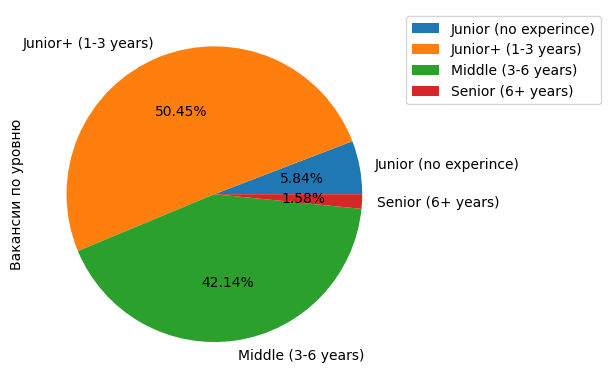

In [ ]:
#Посмотрим какую долю вакансий предлагают разные компании по грейдам. Для этого подсчитаем количество вакансий по каджому грейду и определим их долю в общем числе вакансий
count_by_experience = vacancies_ba['experience'].value_counts().reset_index(name='Count')
count_by_experience['percent'] = (count_by_experience['Count'] / count_by_experience['Count'].sum()).apply('{:,.2%}'.format)
experience_count = count_by_experience.sort_values(by='experience', ascending=True).reset_index(drop=True)
display('Распределение вакансий по требуемому уровню:',
'\n', experience_count)

fig, ax1 = plt.subplots()
experience_count.plot(kind='pie', y='Count', ylabel='Вакансии по уровню', labels=experience_count['experience'], autopct='%1.2f%%', ax=ax1)
ax1.legend(loc='best', bbox_to_anchor=(1.0, 1.0))

In [ ]:
# Определеним типичное место работы для Бизнес-аналитика по следующим параметрам: ТОП-работодателей, зарплата, тип занятости, график работы.
company_by_experience = vacancies_ba.groupby(['experience', 'employer'])['employer'].count().rename('count_of_companies').to_frame().sort_values(['experience', 'count_of_companies'], ascending=[True, False])
print('Топ компаний в поиске по грейдам аналитика данных:')
display(company_by_experience.groupby(level=0).head(5))

Топ компаний в поиске по грейдам аналитика данных:


count_of_companies
experience            employer                                                   
Junior (no experince) aston                                                     6
                      титан-2, холдинг                                          5
                      магнит, розничная сеть                                    4
                      bewise.ai                                                 2
                      capybara it agency                                        2
Junior+ (1-3 years)   магнит, розничная сеть                                   15
                      сбер                                                     15
                      банк втб (пао)                                           14
                      комус                                                     9
                      ано центр развития культурных инициатив                   7
Middle (3-6 years)    сбер                                                     18
                      т1                                                       14
                      магнит, розничная сеть                                    8
                      банк втб (пао)                                            7
                      мегафон                                                   5
Senior (6+ years)     сбер                                                      3
                      т1                                                        2
                      jsa group                                                 1
                      ventra it solutions                                       1
                      vk                                                        1

✔️ Верное решение

Прекрасная работа с группировкой данных

'Средняя зарплата по грейдам аналитика данных:'

,salary_from,salary_to
experience,,
Junior (no experince),64153.0,79647.0
Junior+ (1-3 years),106495.0,153812.0
Middle (3-6 years),156022.0,214720.0
Senior (6+ years),300000.0,375000.0


<Axes: xlabel='experience', ylabel='Средняя зарплата по грейдам Бизнес-аналитика'>

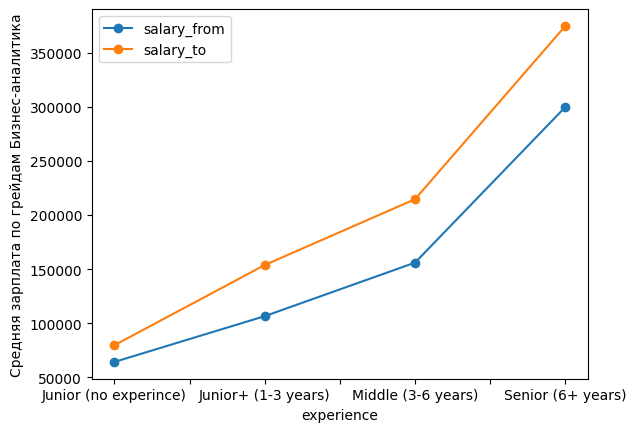

In [ ]:
salary_by_experience = round(vacancies_ba.groupby(['experience'])[['salary_from', 'salary_to']].mean())
display('Средняя зарплата по грейдам аналитика данных:',
    salary_by_experience)

salary_by_experience.plot(style='o-', ylabel='Средняя зарплата по грейдам Бизнес-аналитика')

In [ ]:
salary_by_experience_null = vacancies_ba.groupby(['experience', 'salary_bin'])['salary_bin'].count().rename('count_of_salary_bin').to_frame().sort_values(['experience', 'count_of_salary_bin'], ascending=[True, False])
salary_by_experience_null['salary_bin_percent'] = (salary_by_experience_null['count_of_salary_bin'] / salary_by_experience_null.groupby('experience')['count_of_salary_bin'].sum()).apply('{:,.2%}'.format)
display('Доля вакансий с зарплатной вилкой:',
    salary_by_experience_null)

'Доля вакансий с зарплатной вилкой:'

count_of_salary_bin  \
experience            salary_bin                                       
Junior (no experince) ЗП не указана                               36   
                      Меньше 100 тысяч                            19   
                      От 100 тысяч до 200 тысяч                    4   
Junior+ (1-3 years)   ЗП не указана                              445   
                      От 100 тысяч до 200 тысяч                   41   
                      От 200 тысяч до 300 тысяч                   13   
                      Меньше 100 тысяч                             9   
                      Больше 300 тысяч                             2   
Middle (3-6 years)    ЗП не указана                              384   
                      От 200 тысяч до 300 тысяч                   22   
                      От 100 тысяч до 200 тысяч                   15   
                      Больше 300 тысяч                             5   
Senior (6+ years)     ЗП не указана                               14   
                      Больше 300 тысяч                             2   

                                                salary_bin_percent  
experience            salary_bin                                    
Junior (no experince) ЗП не указана                         61.02%  
                      Меньше 100 тысяч                      32.20%  
                      От 100 тысяч до 200 тысяч              6.78%  
Junior+ (1-3 years)   ЗП не указана                         87.25%  
                      От 100 тысяч до 200 тысяч              8.04%  
                      От 200 тысяч до 300 тысяч              2.55%  
                      Меньше 100 тысяч                       1.76%  
                      Больше 300 тысяч                       0.39%  
Middle (3-6 years)    ЗП не указана                         90.14%  
                      От 200 тысяч до 300 тысяч              5.16%  
                      От 100 тысяч до 200 тысяч              3.52%  
                      Больше 300 тысяч                       1.17%  
Senior (6+ years)     ЗП не указана                         87.50%  
                      Больше 300 тысяч                      12.50%

In [ ]:
time_by_experience = vacancies_ba.groupby(['experience', 'employment'])['employment'].count().rename('count_of_employment').to_frame().sort_values(['experience', 'count_of_employment'], ascending=[True, False])
print('Тип занятости по грейдам аналитика данных:')
time_by_experience['employment_percent'] = (time_by_experience['count_of_employment'] / time_by_experience.groupby('experience')['count_of_employment'].sum()).apply('{:,.2%}'.format)

display(time_by_experience.groupby(level=0).head(5))

Тип занятости по грейдам аналитика данных:


count_of_employment  \
experience            employment                                 
Junior (no experince) Полная занятость                      47   
                      Стажировка                            12   
Junior+ (1-3 years)   Полная занятость                     504   
                      Стажировка                             3   
                      Проектная работа                       2   
                      Частичная занятость                    1   
Middle (3-6 years)    Полная занятость                     423   
                      Проектная работа                       1   
                      Стажировка                             1   
                      Частичная занятость                    1   
Senior (6+ years)     Полная занятость                      16   

                                          employment_percent  
experience            employment                              
Junior (no experince) Полная занятость                79.66%  
                      Стажировка                      20.34%  
Junior+ (1-3 years)   Полная занятость                98.82%  
                      Стажировка                       0.59%  
                      Проектная работа                 0.39%  
                      Частичная занятость              0.20%  
Middle (3-6 years)    Полная занятость                99.30%  
                      Проектная работа                 0.23%  
                      Стажировка                       0.23%  
                      Частичная занятость              0.23%  
Senior (6+ years)     Полная занятость               100.00%

In [ ]:
time_by_experience = vacancies_ba.groupby(['experience', 'schedule'])['schedule'].count().rename('count_of_schedule').to_frame().sort_values(['experience', 'count_of_schedule'], ascending=[True, False])
print('График работы по грейдам аналитика данных:')
time_by_experience['schedule_percent'] = (time_by_experience['count_of_schedule'] / time_by_experience.groupby('experience')['count_of_schedule'].sum()).apply('{:,.2%}'.format)
display(time_by_experience.groupby(level=0).head(5))

График работы по грейдам аналитика данных:


count_of_schedule schedule_percent
experience            schedule                                            
Junior (no experince) Полный день                      41           69.49%
                      Удаленная работа                 15           25.42%
                      Гибкий график                     3            5.08%
Junior+ (1-3 years)   Полный день                     404           79.22%
                      Удаленная работа                 91           17.84%
                      Гибкий график                    14            2.75%
                      Сменный график                    1            0.20%
Middle (3-6 years)    Полный день                     344           80.75%
                      Удаленная работа                 70           16.43%
                      Гибкий график                    12            2.82%
Senior (6+ years)     Полный день                      10           62.50%
                      Удаленная работа                  5           31.25%
                      Гибкий график                     1            6.25%

✔️ Верное решение

Оч хорошо.